In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploratory data analysis

## Import of Libraries


In [ ]:
import time
tiempo_inicio = time.time()

In [ ]:
import pandas as pd
import os
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from datetime import datetime, timedelta
import calendar

## We join the csv files to build a single dataframe

In [6]:
relative_path  = "/content/drive/MyDrive/data/beijing+multi+site+air+quality+data/PRSA_Data_20130301-20170228"

In [7]:
archivos_csv = [archivo for archivo in os.listdir(relative_path) if archivo.endswith('.csv')]
dataframes = []

In [8]:
# Read each CSV file and store it in the list of dataframes
for archivo_csv in archivos_csv:
    ruta_archivo = os.path.join(relative_path, archivo_csv)
    dataframe = pd.read_csv(ruta_archivo)
    dataframes.append(dataframe)

In [9]:
df = pd.concat(dataframes)

In [10]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


## Calculate the AQI

In [11]:
def calculate_aqi(row):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    max_value = row[pollutants].max()

    if max_value <= 50:
        return 'Excelent'
    elif max_value <= 100:
        return 'Good'
    elif max_value <= 150:
        return 'Slightly Polluted'
    elif max_value <= 200:
        return 'Lightly Polluted'
    elif max_value <= 250:
        return 'Moderately Polluted'
    elif max_value <= 300:
        return 'Heavily Polluted'
    else:
        return 'Severely Polluted'

df['AQI'] = df.apply(calculate_aqi, axis=1)

In [12]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,Heavily Polluted
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,Heavily Polluted
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,Heavily Polluted
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,Excelent
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,Lightly Polluted


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
 18  AQI      420768 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory usage: 64.2+ MB


In [14]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [15]:
print(f'No. Rows {df.shape[0]}, No Columns: {df.shape[1]}')

No. Rows 420768, No Columns: 19


In [16]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [17]:
print('Percentage of Null\n',round(df.isnull().sum()/len(df.index), 2)*100)

Percentage of Null
 No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      2.0
PM10       2.0
SO2        2.0
NO2        3.0
CO         5.0
O3         3.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
AQI        0.0
dtype: float64


In [18]:
df['wd'].unique()

array(['NNW', 'NW', 'N', 'W', 'ENE', 'NE', 'E', 'NNE', 'SW', 'SSW', 'S',
       'WSW', 'ESE', 'SE', 'WNW', 'SSE', nan], dtype=object)

In [19]:
df['station'].unique()

array(['Dongsi', 'Dingling', 'Changping', 'Aotizhongxin', 'Tiantan',
       'Shunyi', 'Gucheng', 'Huairou', 'Guanyuan', 'Nongzhanguan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [20]:
df['AQI'].unique()

array(['Heavily Polluted', 'Excelent', 'Lightly Polluted',
       'Severely Polluted', 'Good', 'Slightly Polluted',
       'Moderately Polluted'], dtype=object)

In [21]:
columnas_a_excluir = ['wd', 'station','AQI']
df1 = df
df = df.drop(columnas_a_excluir, axis=1)


In [22]:
sesgo = df.mean() - df.median()
print("Positive Segos y Negative\n",sesgo)

Positive Segos y Negative
 No         0.000000
year      -0.337440
month     -0.477070
day       -0.270363
hour       0.000000
PM2.5     24.793428
PM10      22.602618
SO2        8.830835
NO2        7.638586
CO       330.766454
O3        12.372271
TEMP      -0.961024
PRES       0.346982
DEWP      -0.609178
RAIN       0.064476
WSPM       0.329711
dtype: float64


In [23]:
moda = df.mode().iloc[0]
media = df.mean()
mediana = df.median()

## Distribution

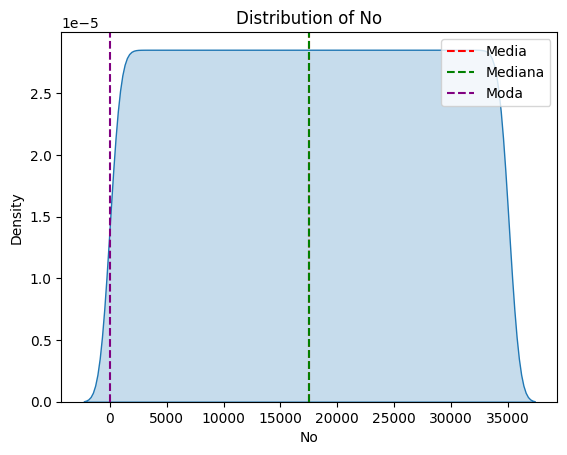

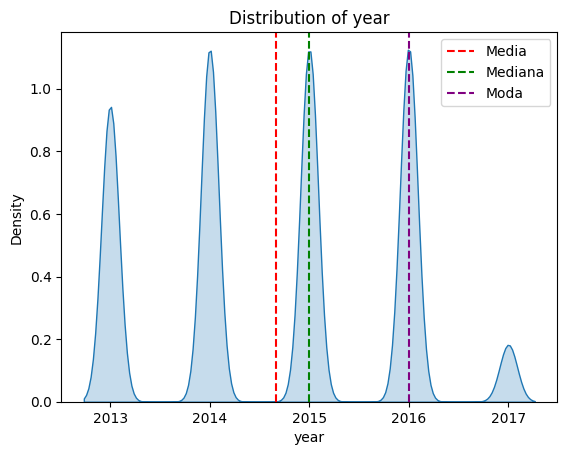

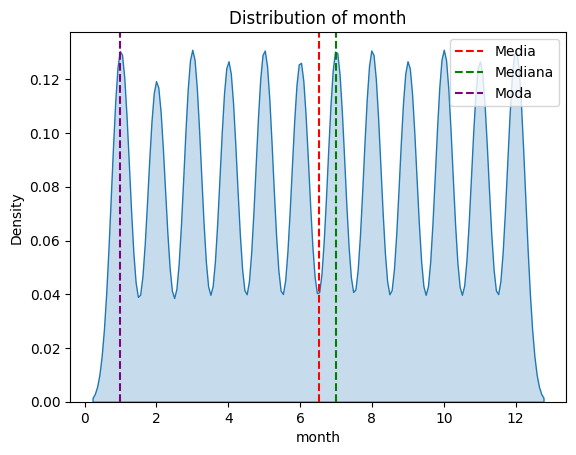

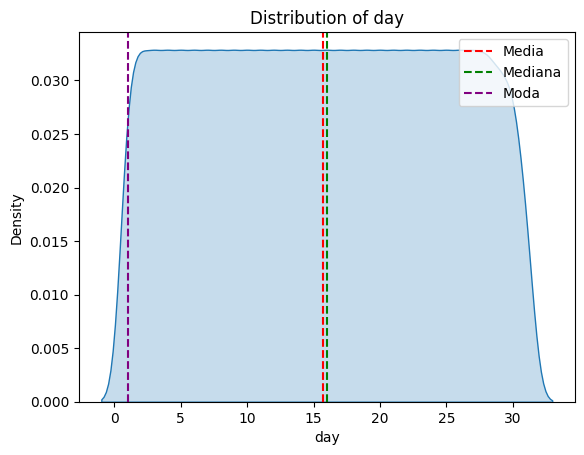

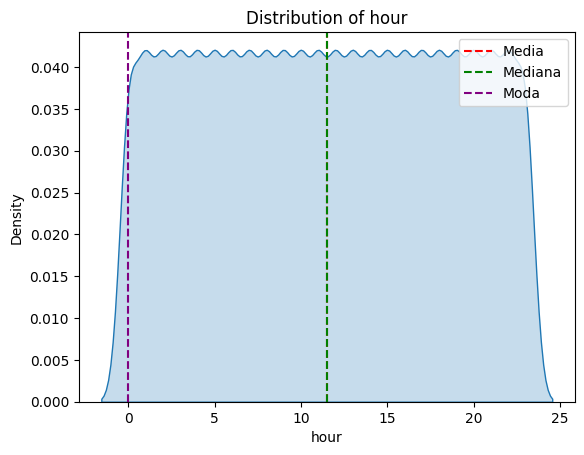

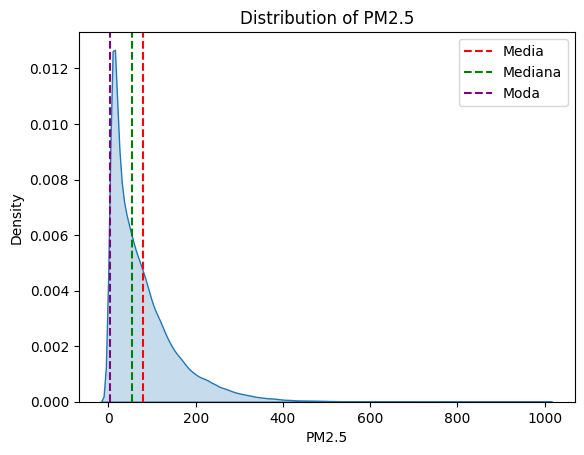

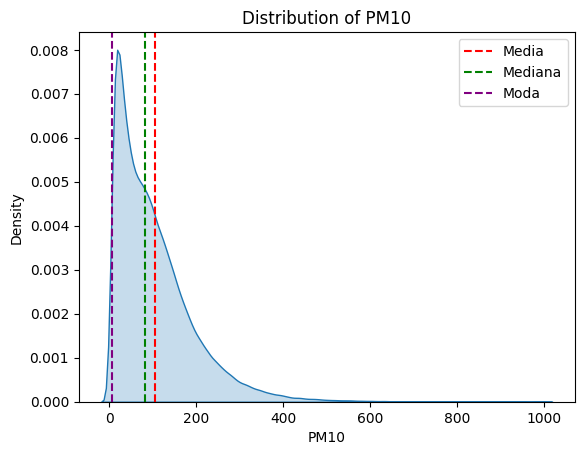

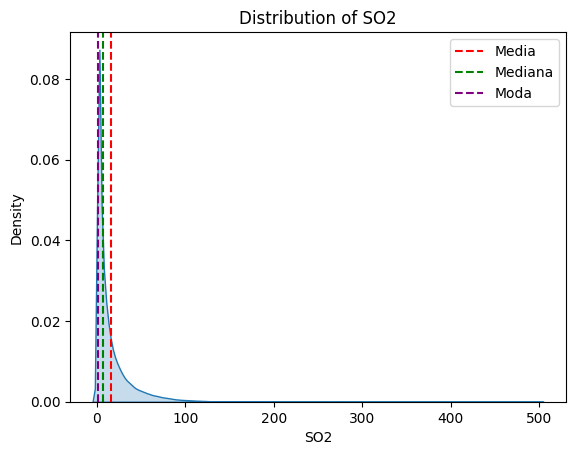

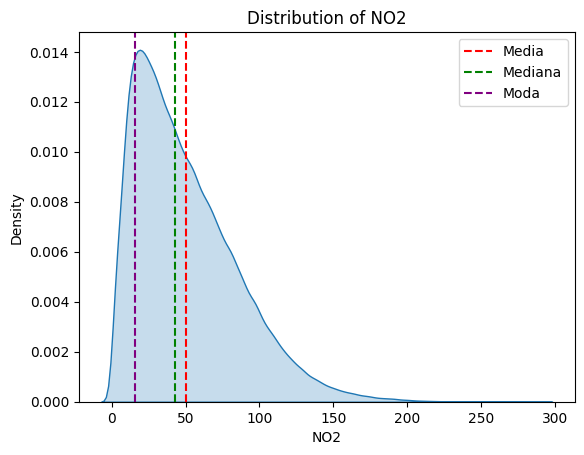

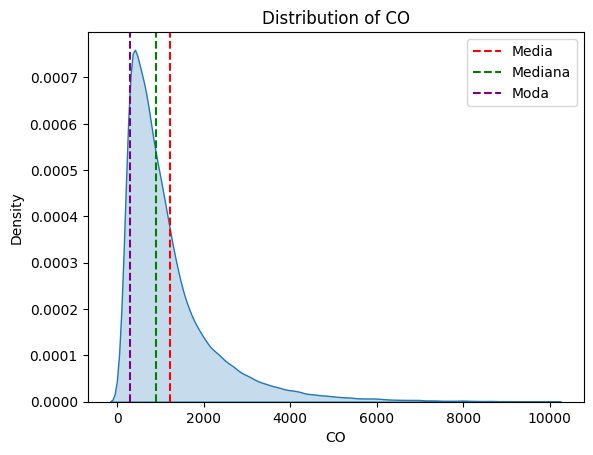

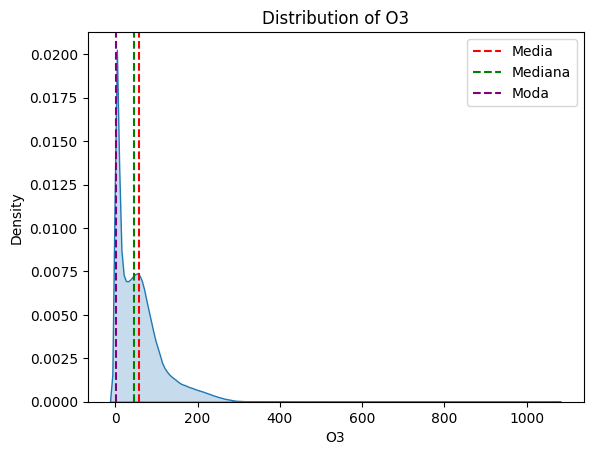

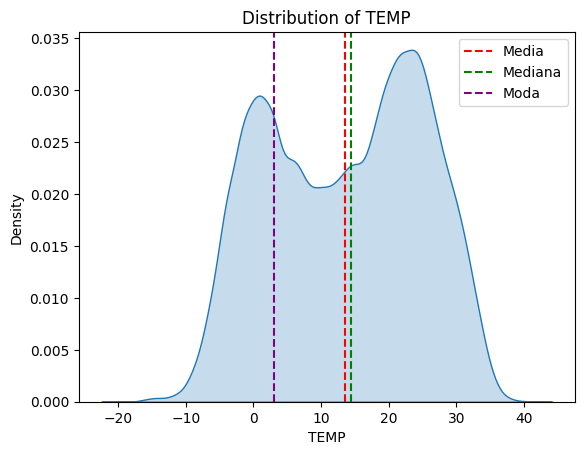

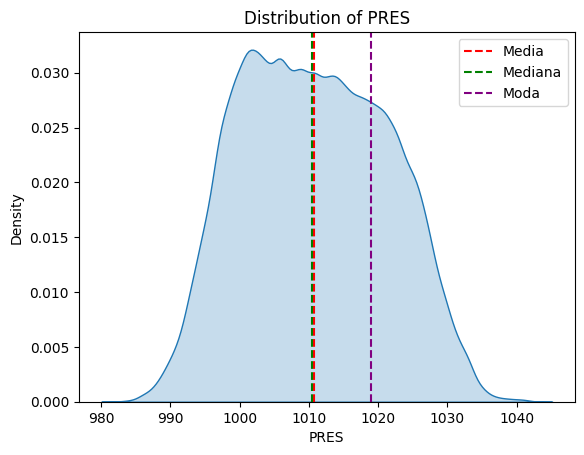

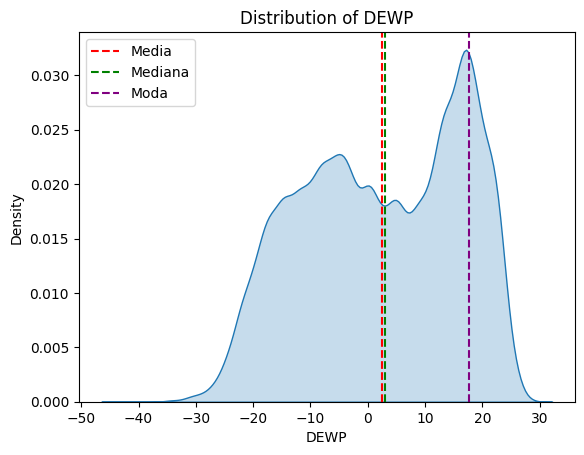

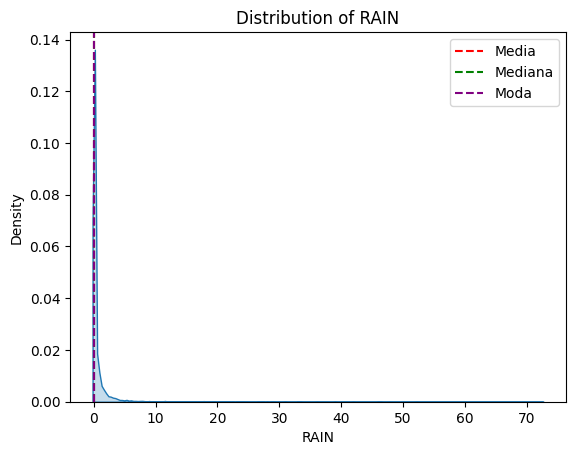

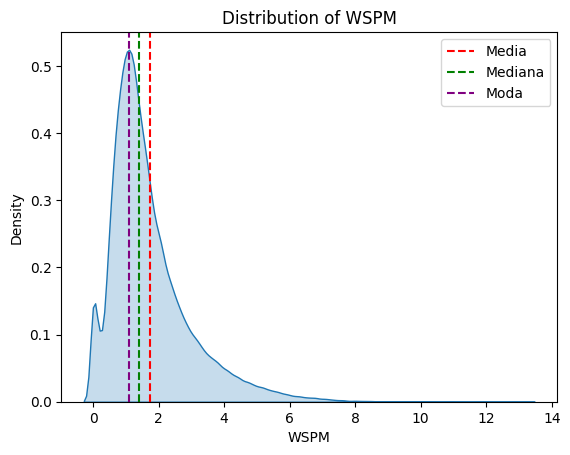

In [24]:
for columna in df.columns:
    plt.figure()
    sns.kdeplot(df[columna], fill=True)
    plt.axvline(x=media[columna], color='red', linestyle='--', label='Media')
    plt.axvline(x=mediana[columna], color='green', linestyle='--', label='Mediana')
    plt.axvline(x=moda[columna], color='purple', linestyle='--', label='Moda')
    plt.xlabel(columna)
    plt.ylabel('Density')
    plt.title(f'Distribution of {columna}')
    plt.legend()
    plt.show()

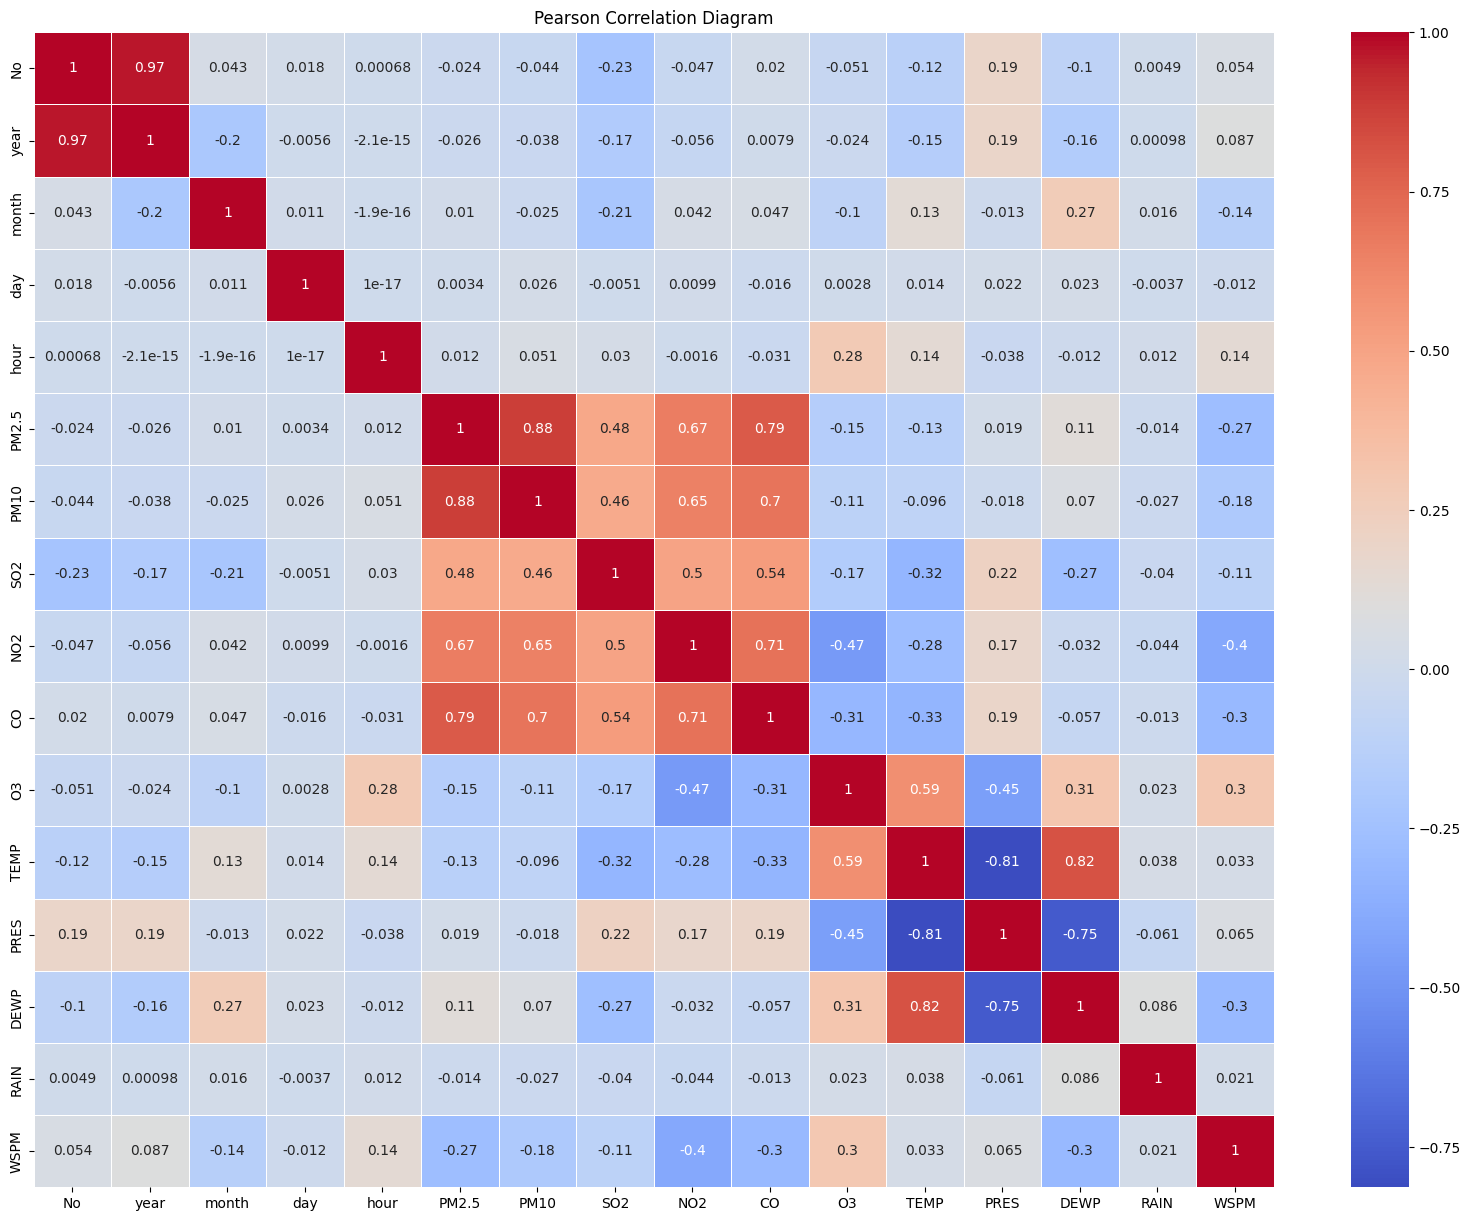

In [25]:
# Calculate the Pearson correlation matrix
correlation_matrix = df.corr(method='pearson')

# Create a heat map
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Diagram')
plt.show()

In [26]:
print(correlation_matrix)

             No          year         month           day          hour  \
No     1.000000  9.695331e-01  4.318051e-02  1.776442e-02  6.838683e-04   
year   0.969533  1.000000e+00 -2.020099e-01 -5.569082e-03 -2.115260e-15   
month  0.043181 -2.020099e-01  1.000000e+00  1.052232e-02 -1.905981e-16   
day    0.017764 -5.569082e-03  1.052232e-02  1.000000e+00  1.013388e-17   
hour   0.000684 -2.115260e-15 -1.905981e-16  1.013388e-17  1.000000e+00   
PM2.5 -0.023569 -2.583578e-02  1.043824e-02  3.428114e-03  1.170939e-02   
PM10  -0.044217 -3.772263e-02 -2.537989e-02  2.601467e-02  5.142637e-02   
SO2   -0.226739 -1.702462e-01 -2.138978e-01 -5.145818e-03  2.994683e-02   
NO2   -0.046553 -5.627017e-02  4.229308e-02  9.877839e-03 -1.558836e-03   
CO     0.019660  7.861472e-03  4.664755e-02 -1.569193e-02 -3.135823e-02   
O3    -0.050868 -2.438435e-02 -1.036914e-01  2.829179e-03  2.822873e-01   
TEMP  -0.122409 -1.517906e-01  1.313233e-01  1.439033e-02  1.419834e-01   
PRES   0.188280  1.866617

In [27]:
df = df1

In [28]:
df['PM2.5'].describe()

,PM2.5
count,412029.000000
mean,79.793428
std,80.822391
min,2.000000
25%,20.000000
50%,55.000000
75%,111.000000
max,999.000000


In [29]:
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)

<ipython-input-29-a9bb733ab6e7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)


In [30]:
print('Percentage of Nulls\n',round(df.isnull().sum()/len(df.index), 2)*100)

Percentage of Nulls
 No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       2.0
SO2        2.0
NO2        3.0
CO         5.0
O3         3.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
AQI        0.0
dtype: float64


## Null substitution


In [31]:
df['PM10'].fillna(df['PM10'].median(), inplace=True)
df['SO2'].fillna(df['SO2'].median(), inplace=True)
df['NO2'].fillna(df['NO2'].median(), inplace=True)
df['CO'].fillna(df['CO'].median(), inplace=True)
df['O3'].fillna(df['O3'].median(), inplace=True)

<ipython-input-31-22b91ec06a1e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM10'].fillna(df['PM10'].median(), inplace=True)
<ipython-input-31-22b91ec06a1e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [32]:
print('Percentage of Nulls\n',round(df.isnull().sum()/len(df.index), 2)*100)

Percentage of Nulls
 No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
AQI        0.0
dtype: float64


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
 18  AQI      420768 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory usage: 64.2+ MB


## Analysis of all the years


In [34]:
columns_all = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'gray', 'brown']

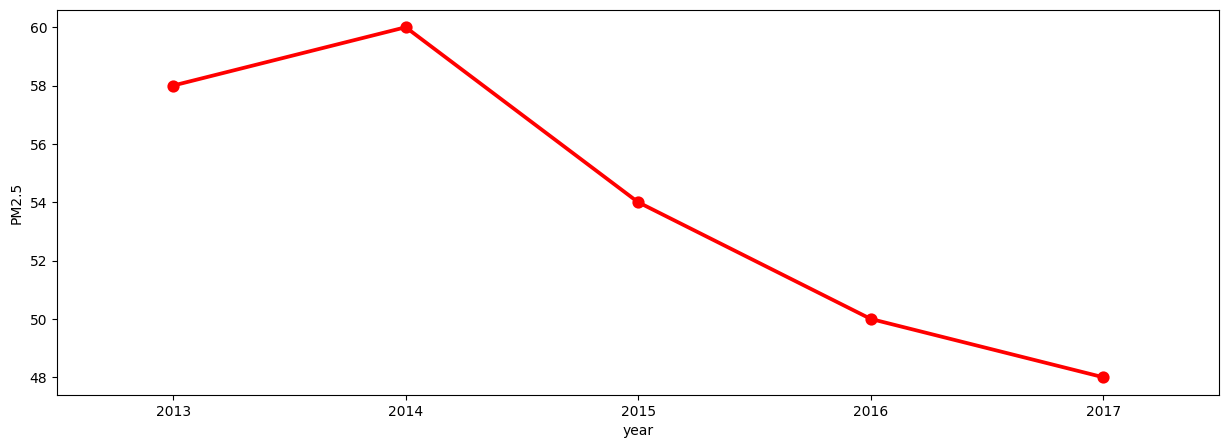

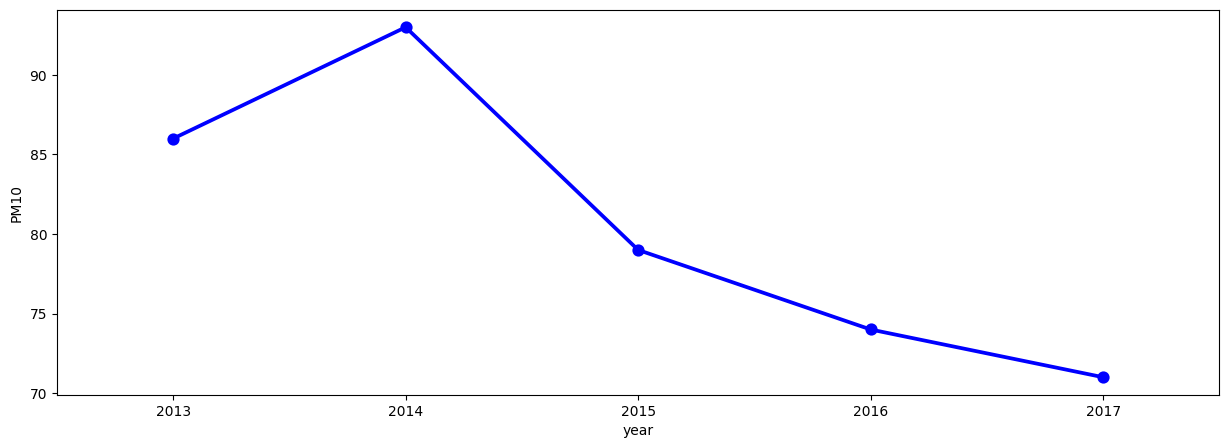

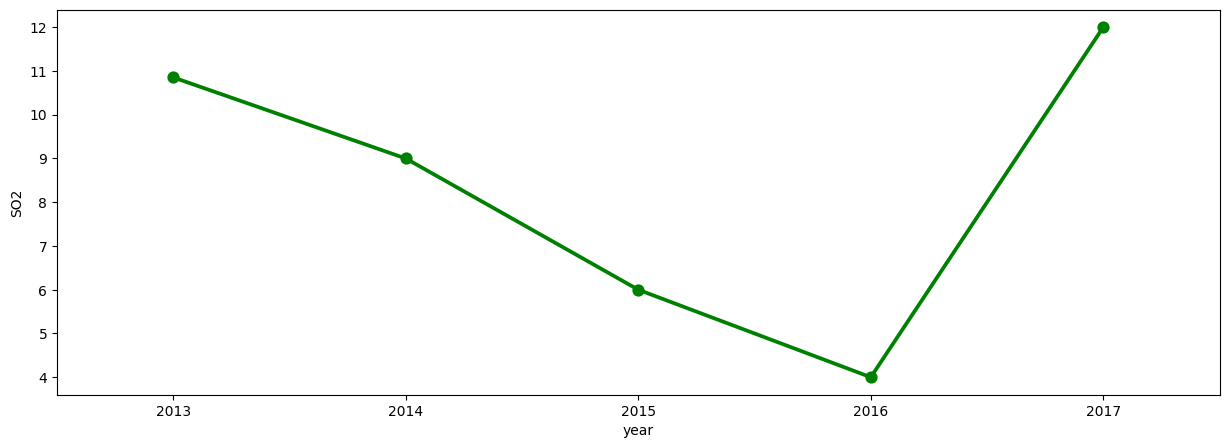

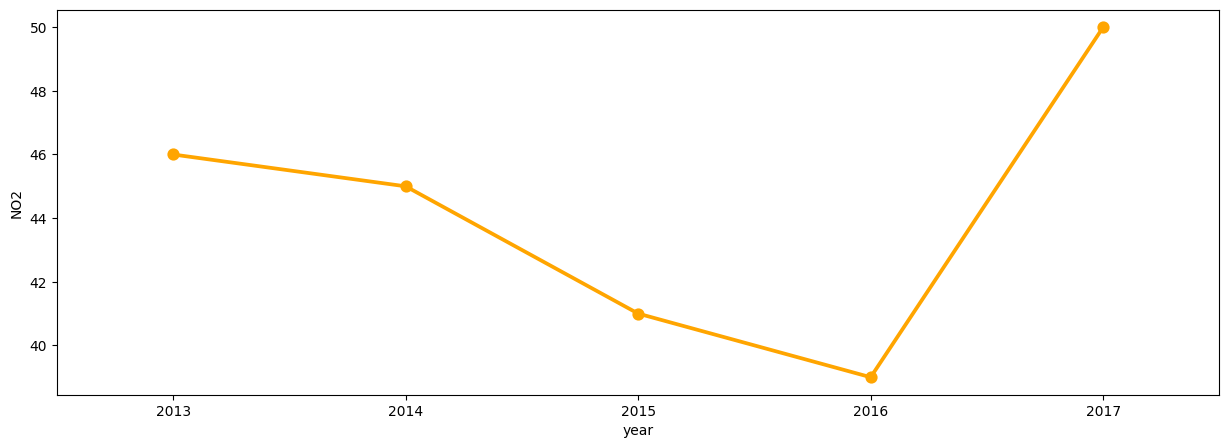

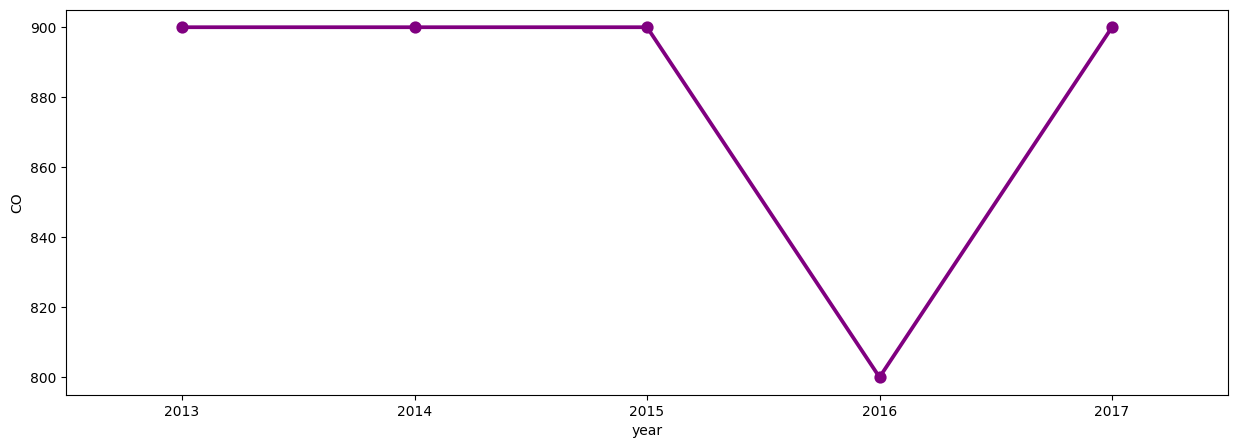

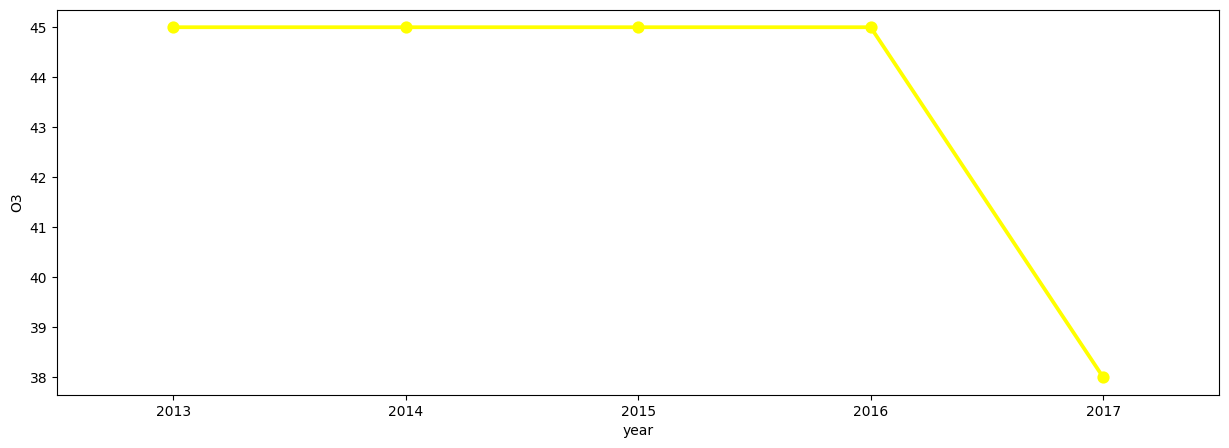

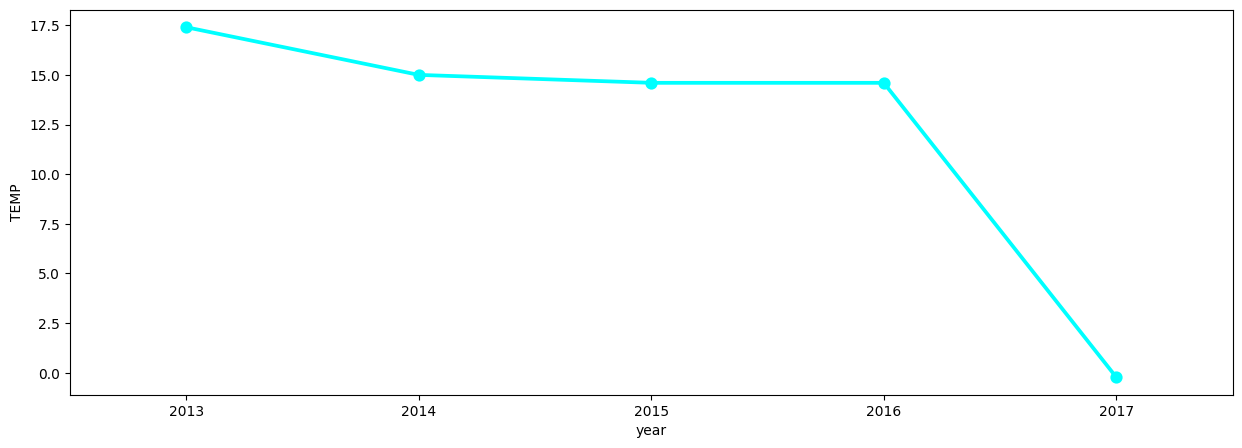

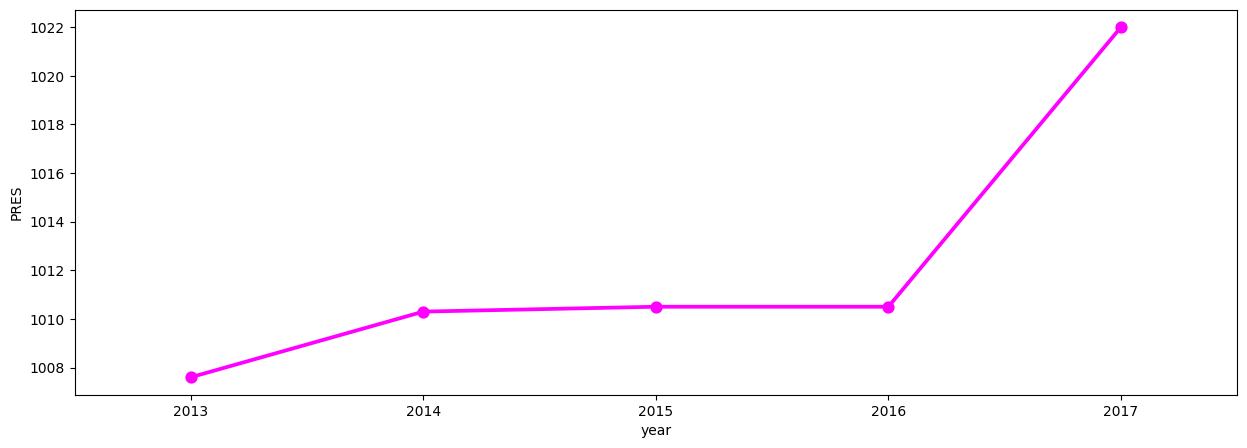

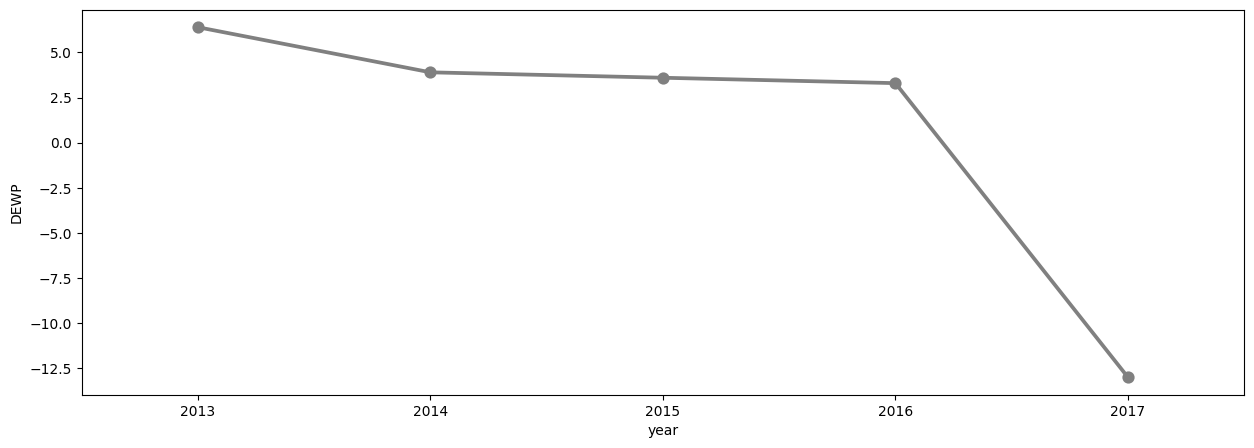

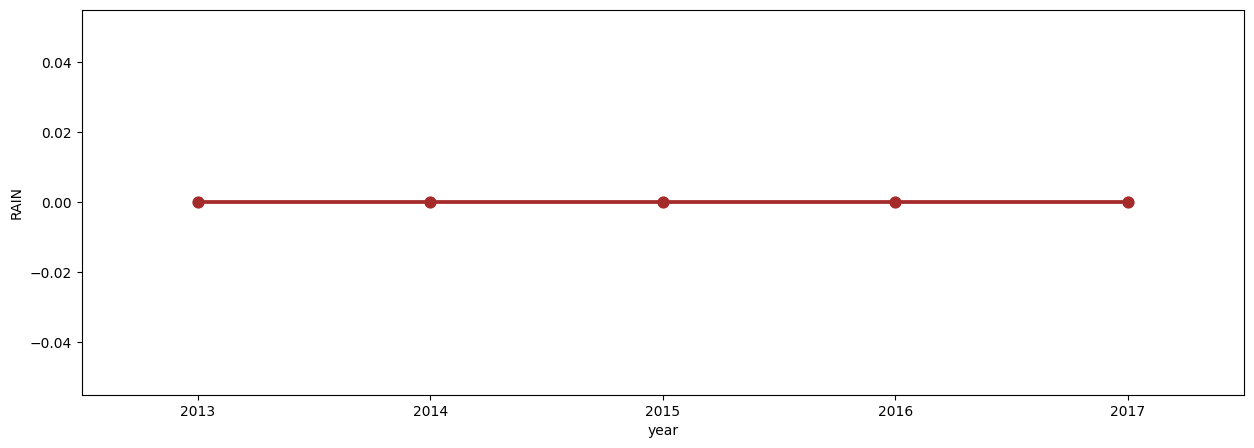

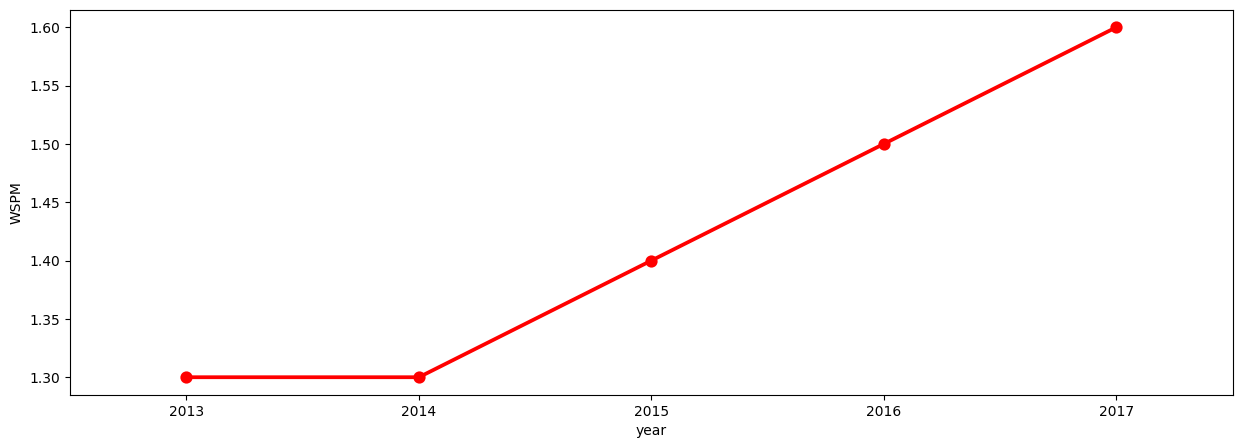

In [35]:
for i, colum in enumerate(columns_all):
    df_aux = df[[colum,'year']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='year', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
 18  AQI      420768 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory usage: 64.2+ MB


## Analysis by Month

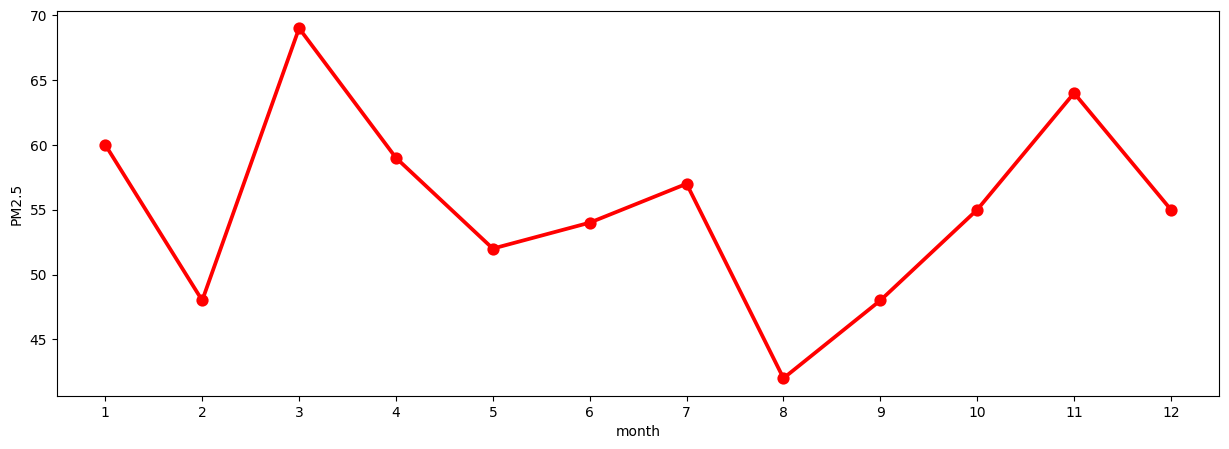

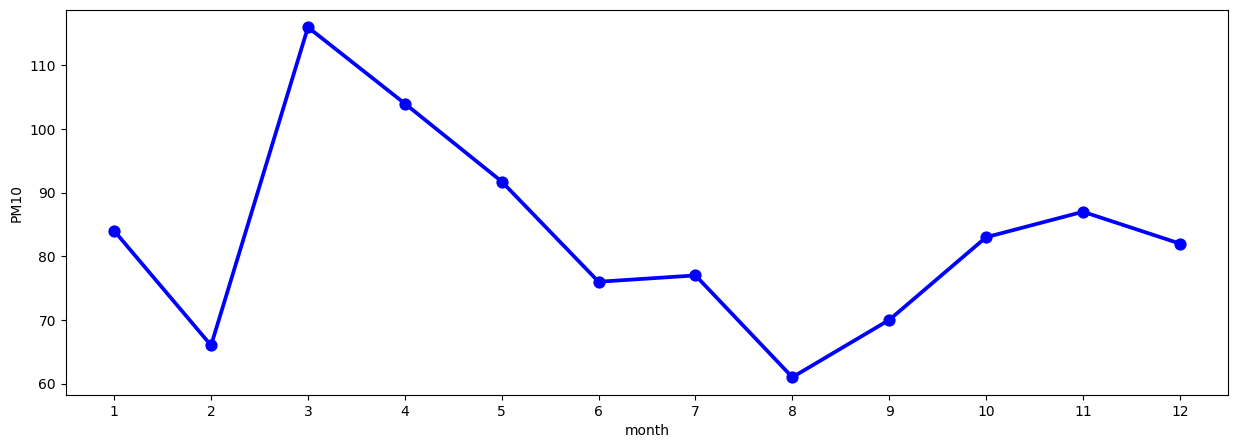

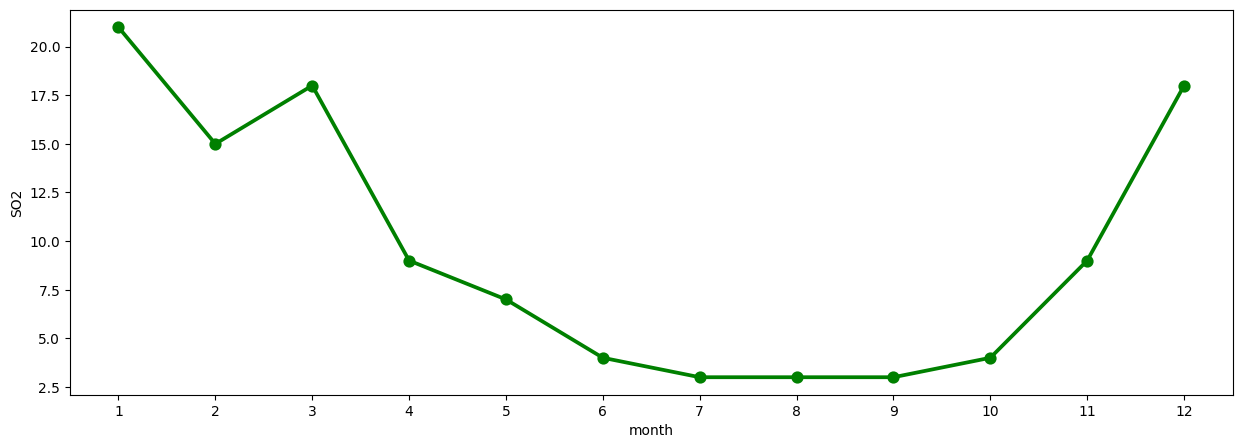

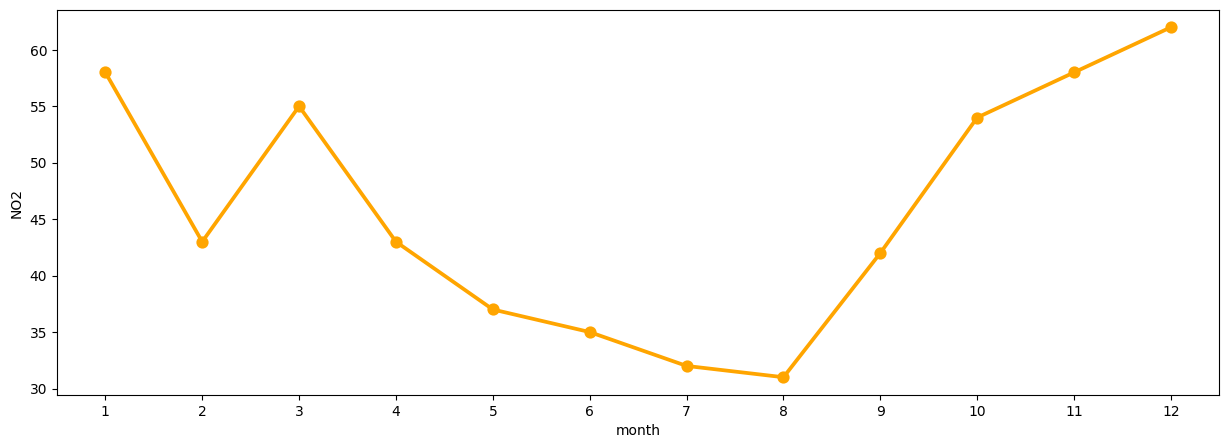

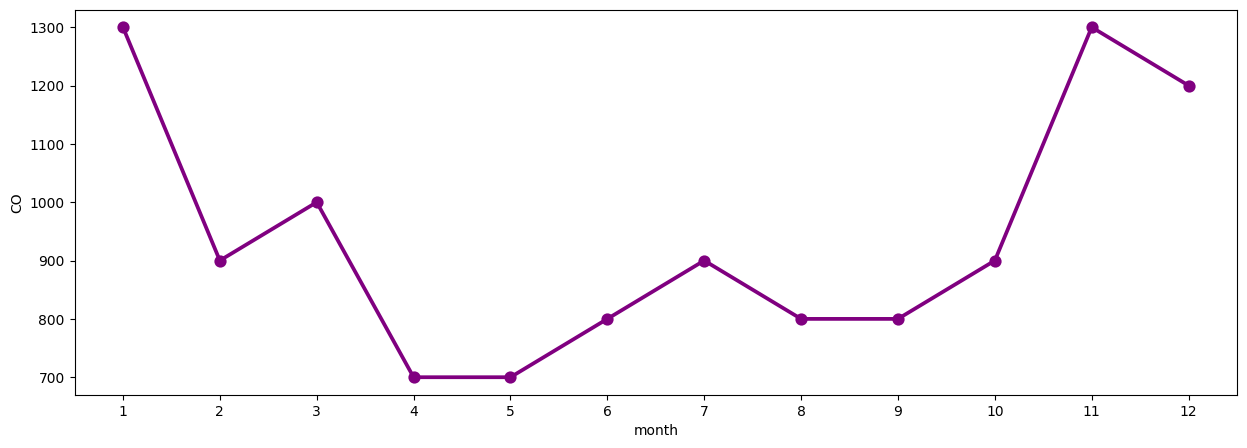

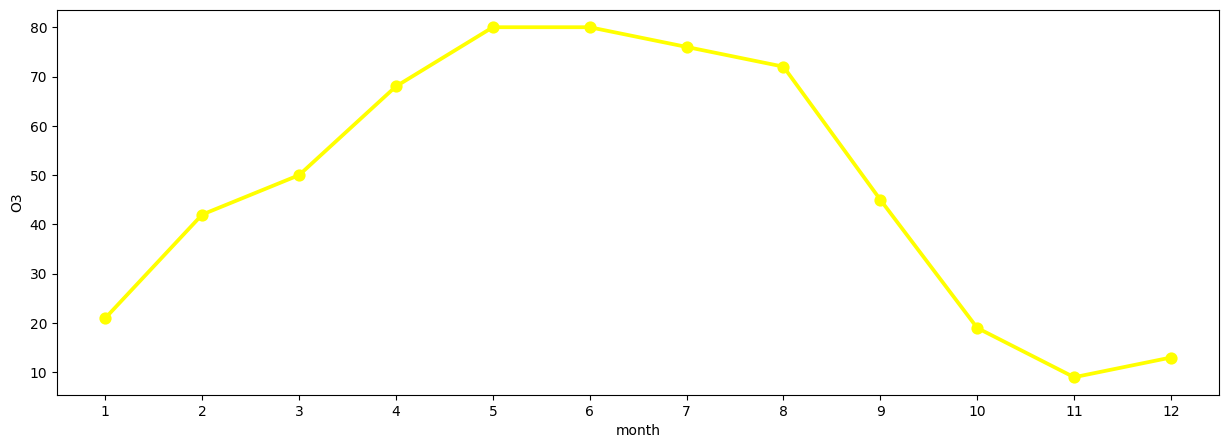

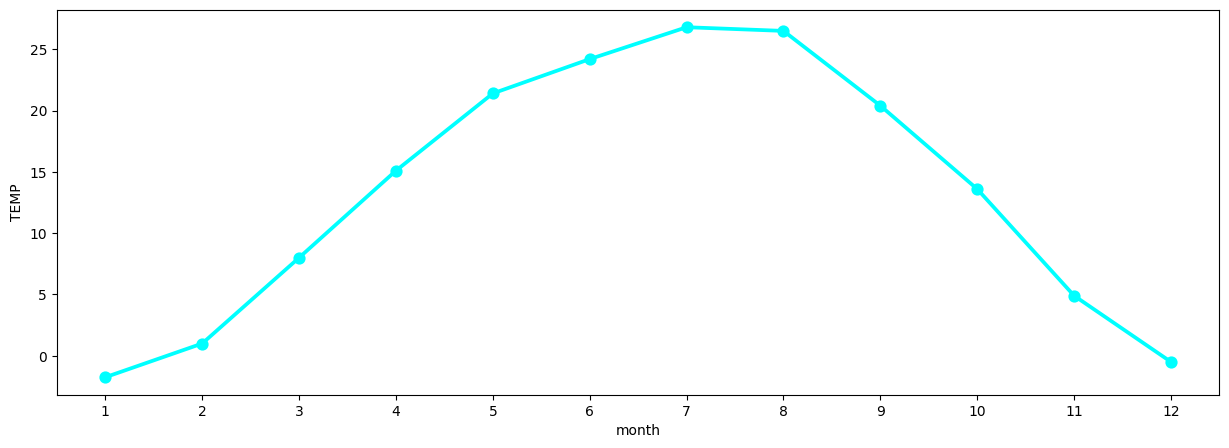

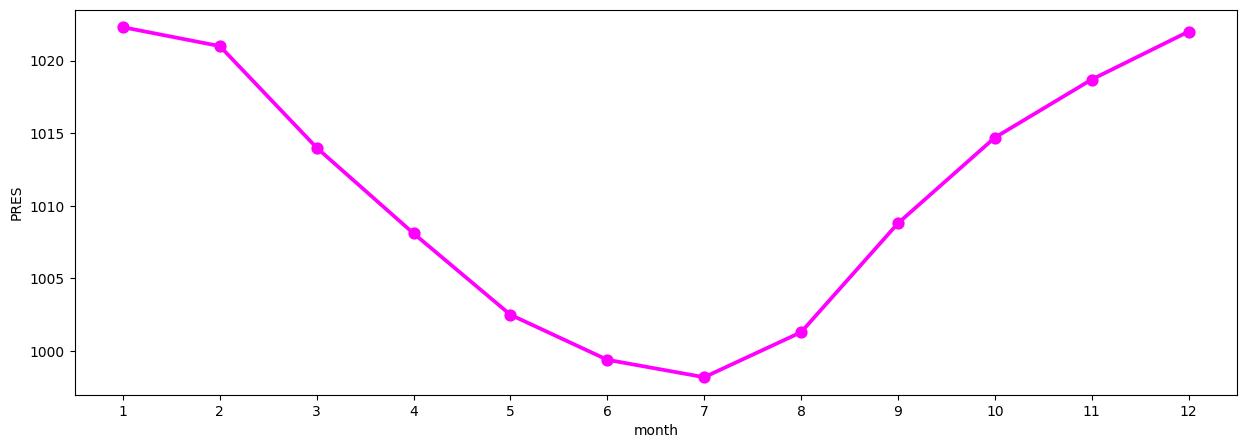

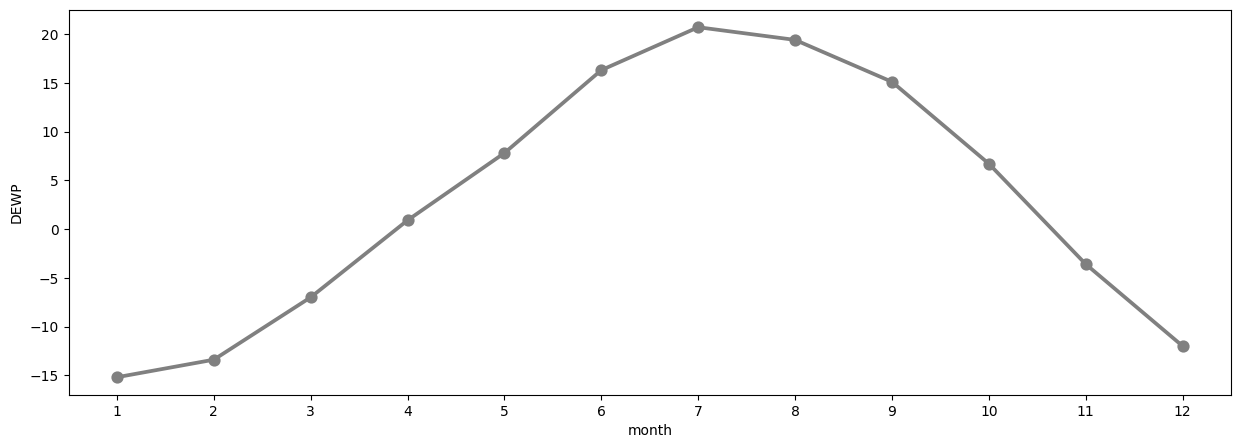

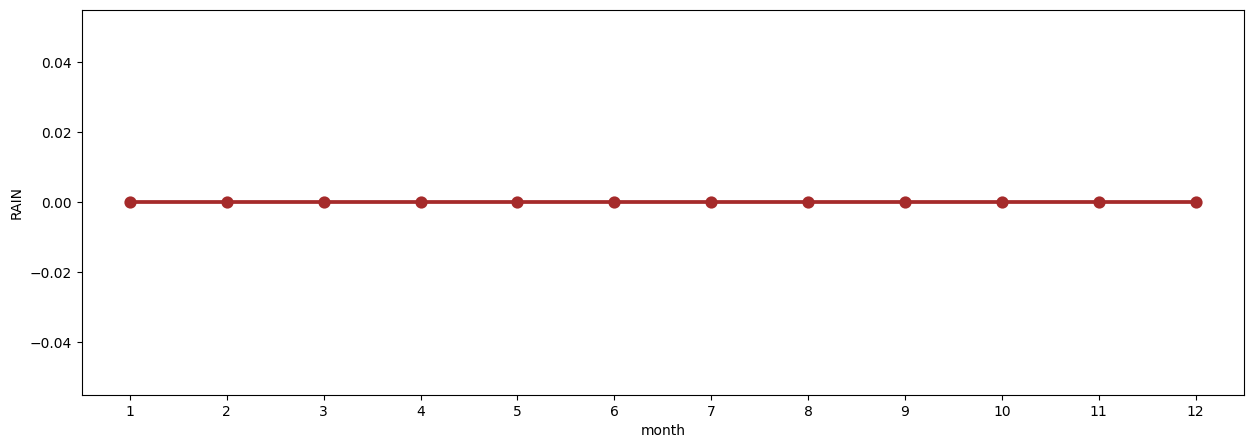

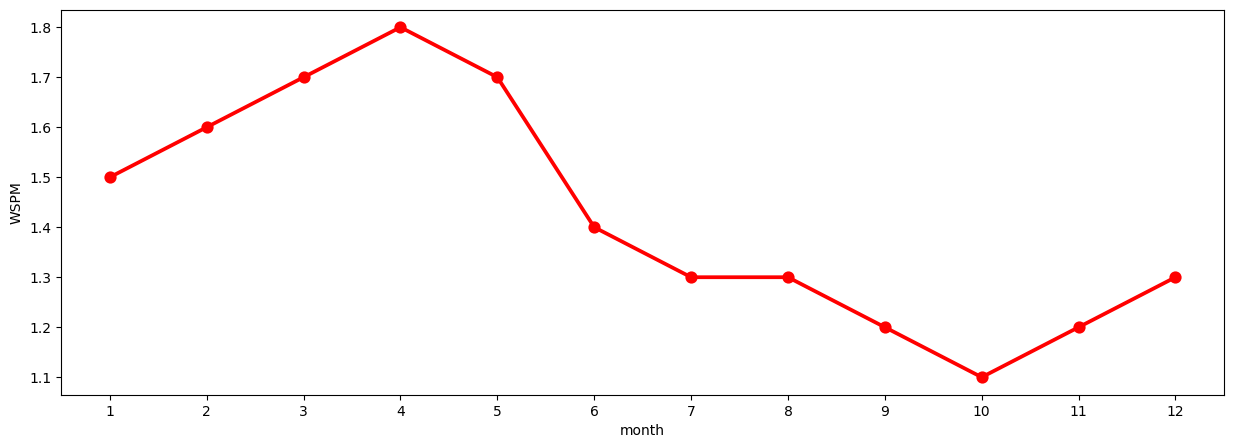

In [37]:
for i, colum in enumerate(columns_all):
    df_aux = df[[colum,'month']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='month', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])

## Analysis by Hour


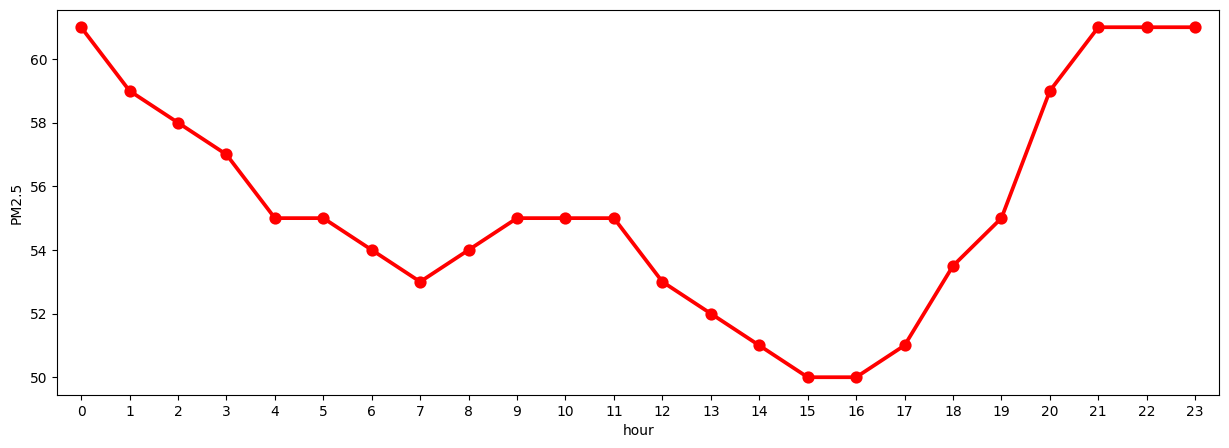

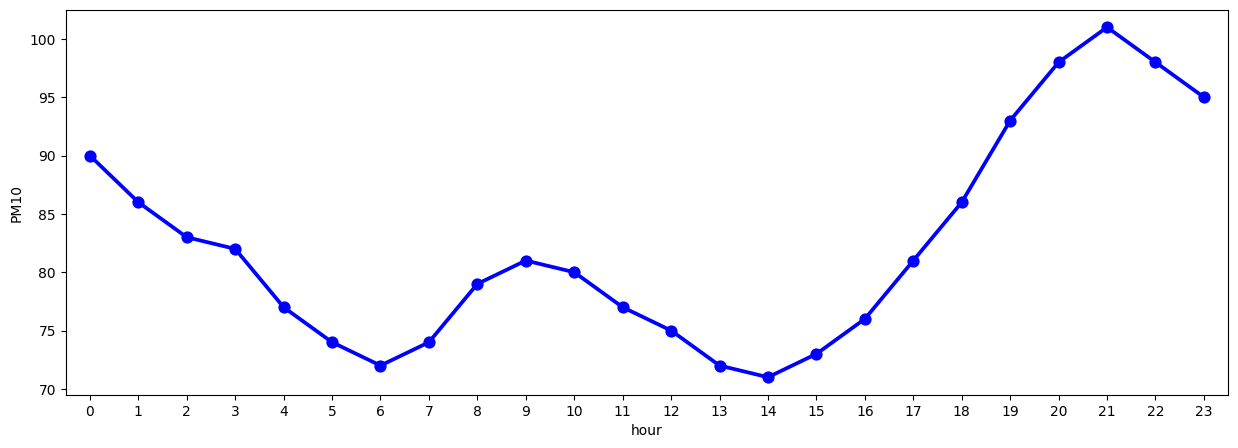

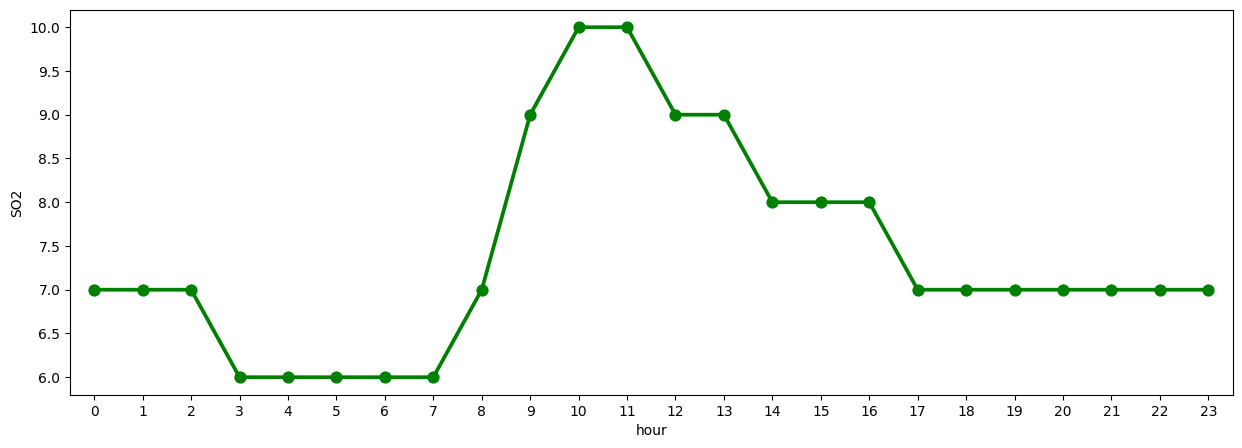

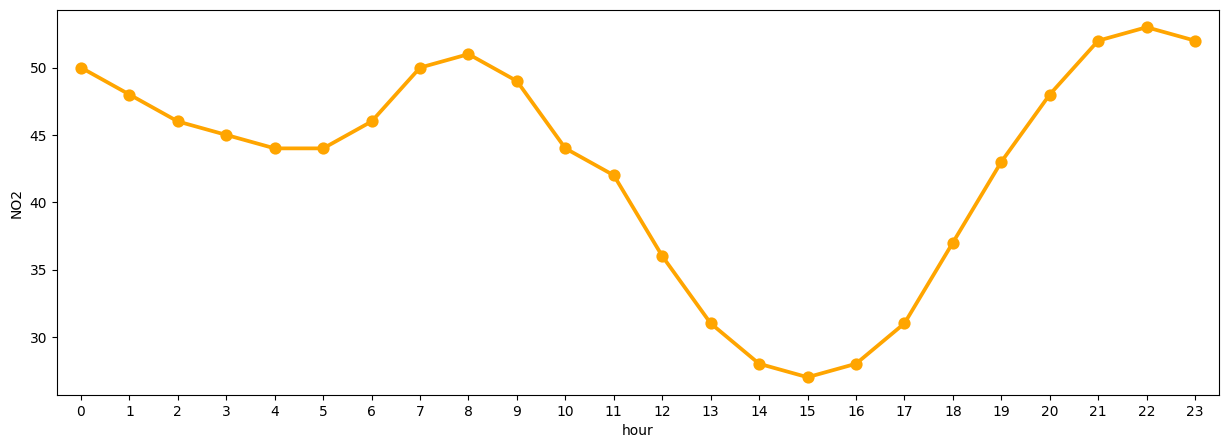

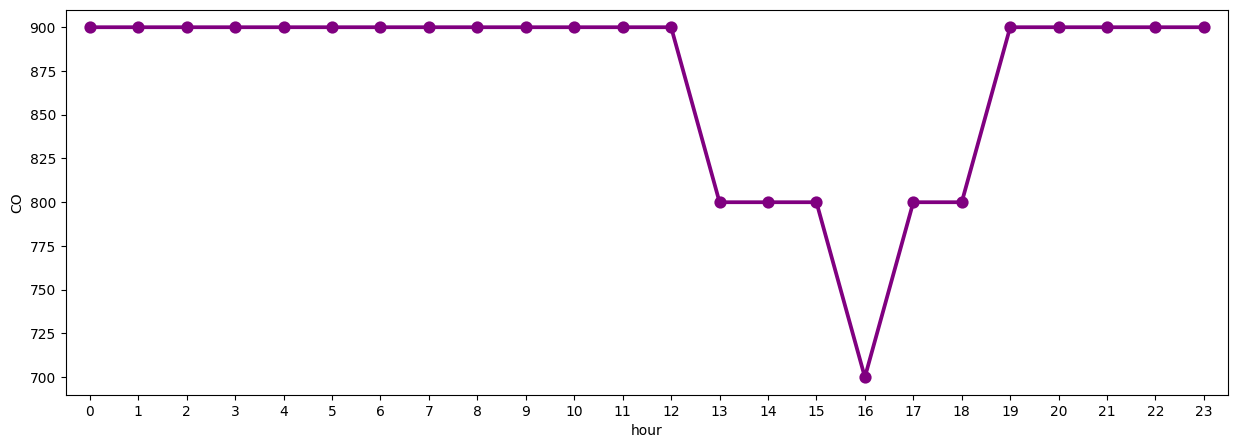

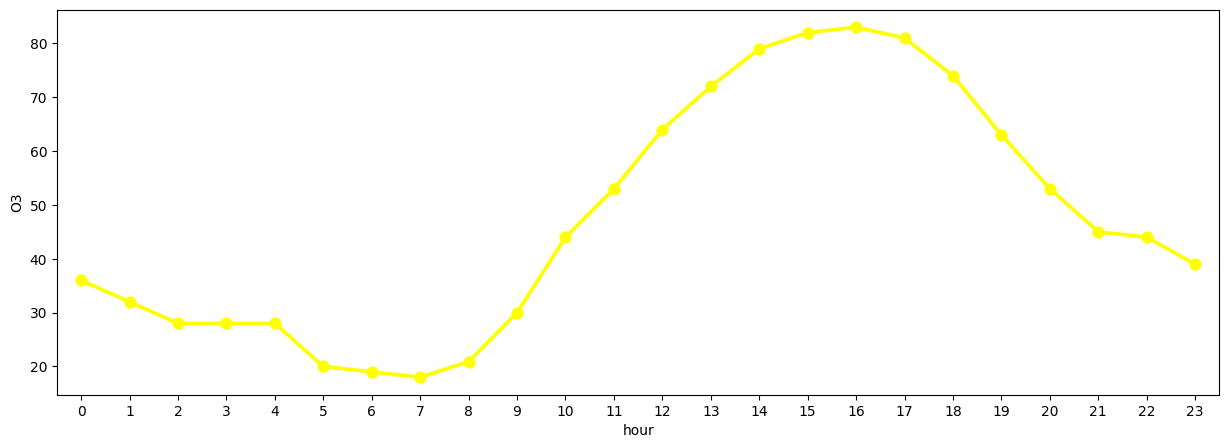

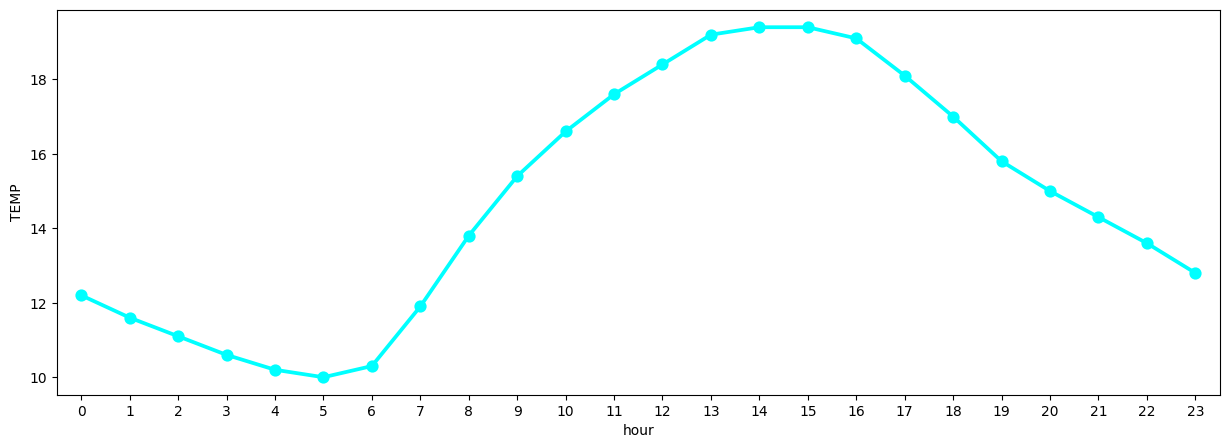

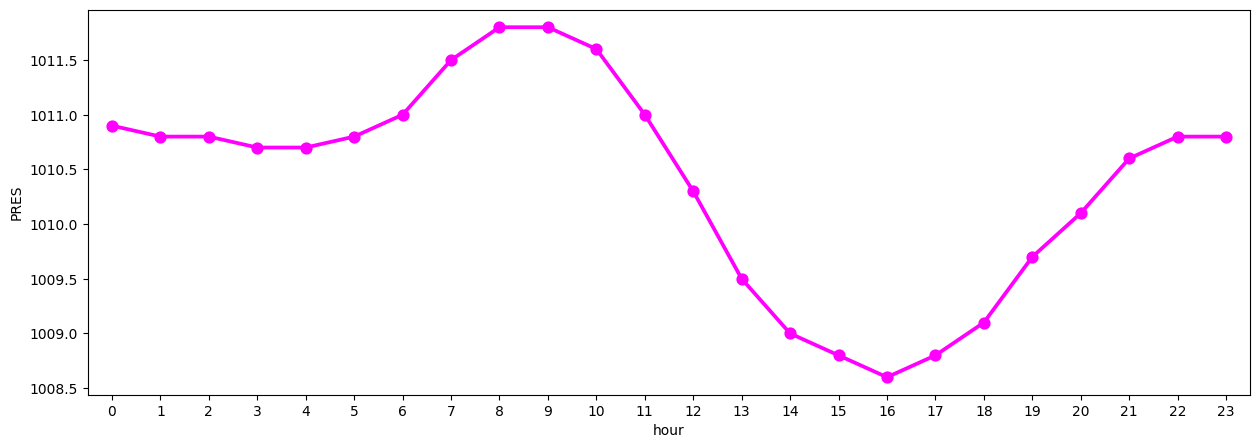

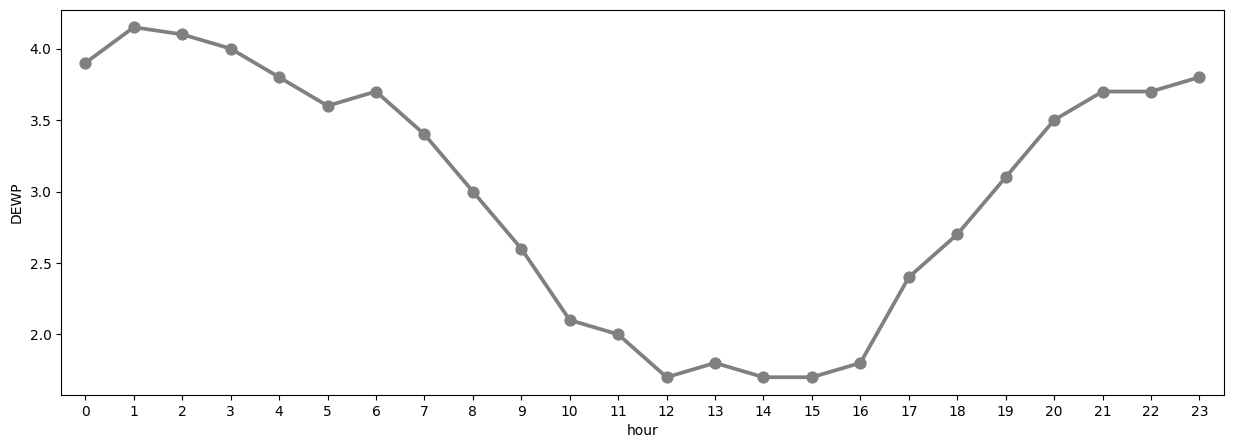

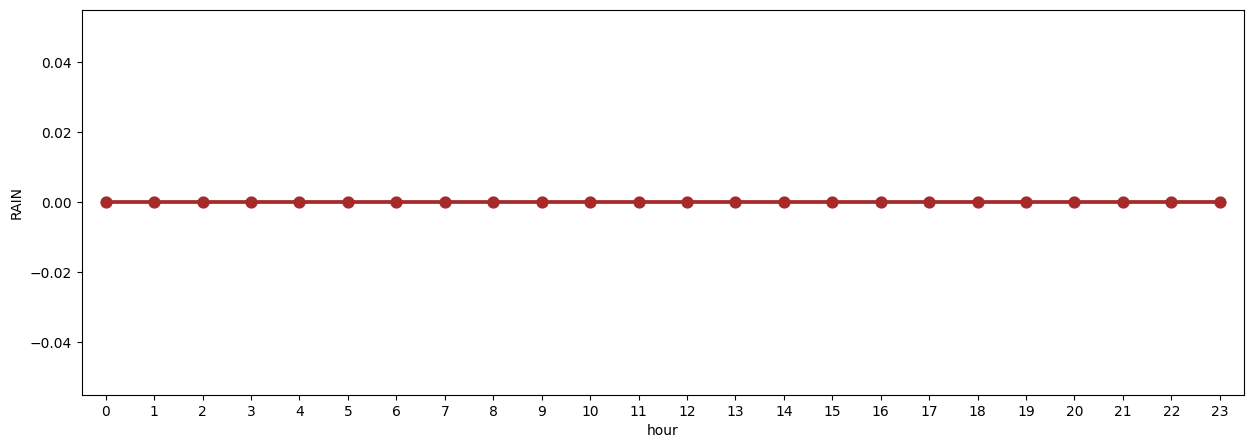

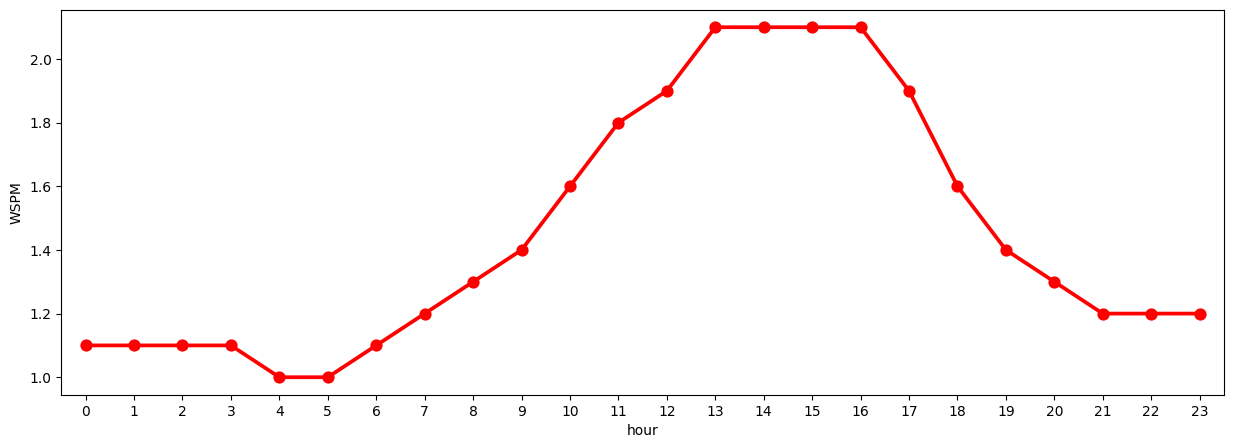

In [38]:
for i, colum in enumerate(columns_all):
    df_aux = df[[colum,'hour']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='hour', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])

## Analysis by Month of all years


In [39]:
df2 = df

In [40]:
years = df['year'].unique()
print("Years: ", years)

Years:  [2013 2014 2015 2016 2017]


In [42]:
for year in years:
    df_year = df[df['year']==year]
    for i, colum in enumerate(columns_all):
        df_aux = df_year[[colum,'month']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=False)
        f,ax=plt.subplots(figsize=(15,5))
        sns.pointplot(x='month', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])
        plt.title(f'Chart for the year {year}')

Output hidden; open in https://colab.research.google.com to view.

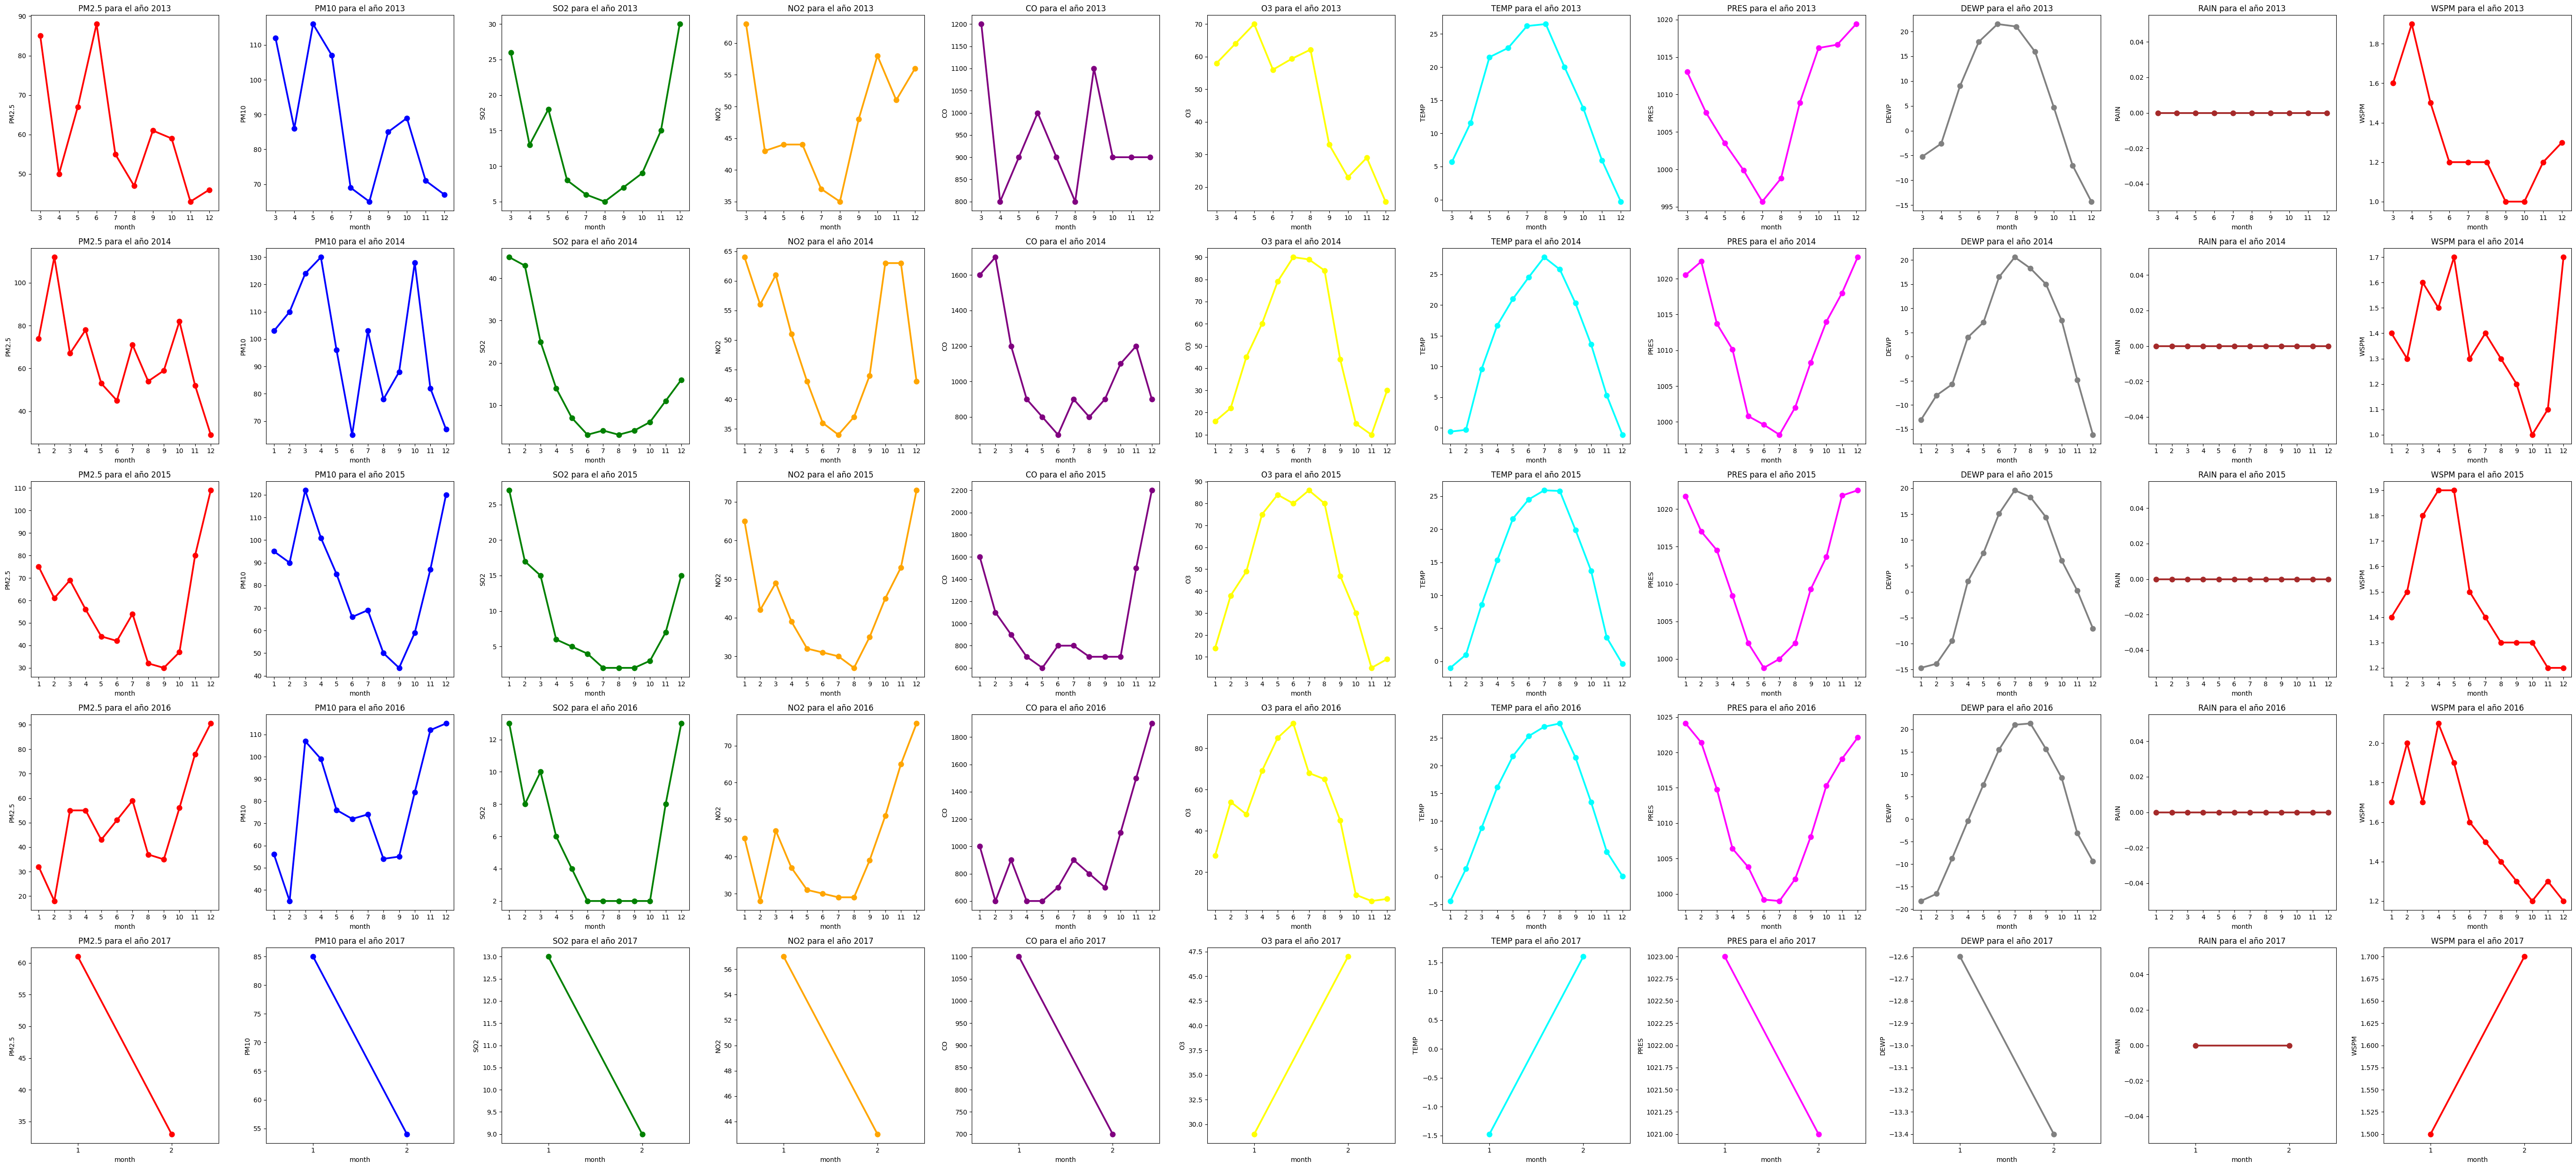